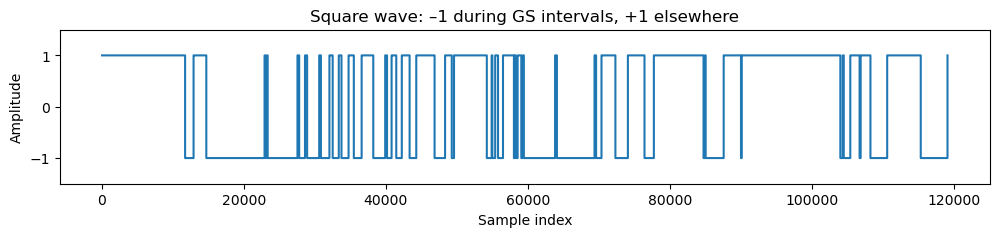

[ 1  1  1 ... -1 -1  1]
           age       pre
1000       0.0  0.016280
999      100.0  0.016431
998      200.0  0.016568
997      300.0  0.016690
996      400.0  0.016798
...        ...       ...
4      99600.0  0.003828
3      99700.0  0.002715
2      99800.0  0.001597
1      99900.0  0.000475
0     100000.0 -0.000650

[1001 rows x 2 columns]
[1. 1. 1. ... 1. 1. 1.]
        age       pre
1000    0.0  0.016280
999   100.0  0.016431
998   200.0  0.016568
997   300.0  0.016690
996   400.0  0.016798


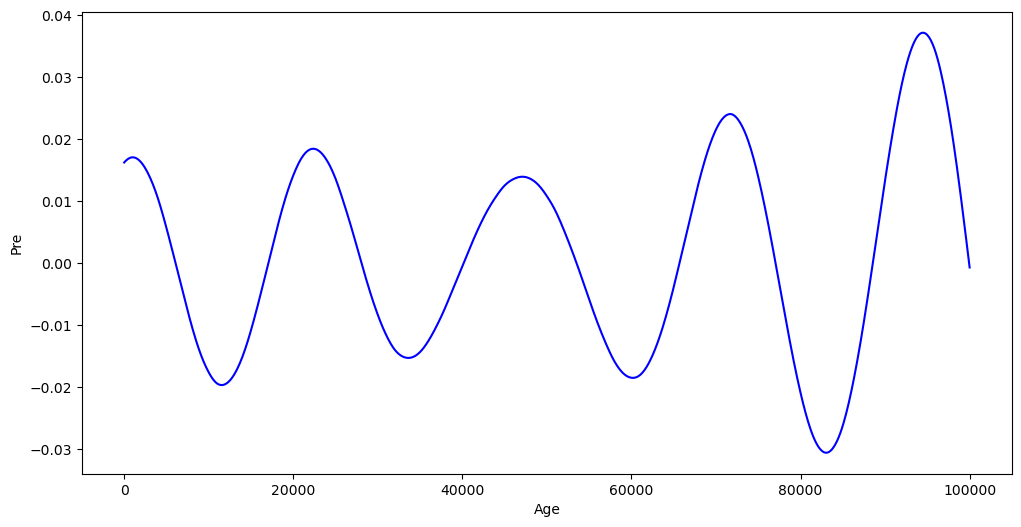

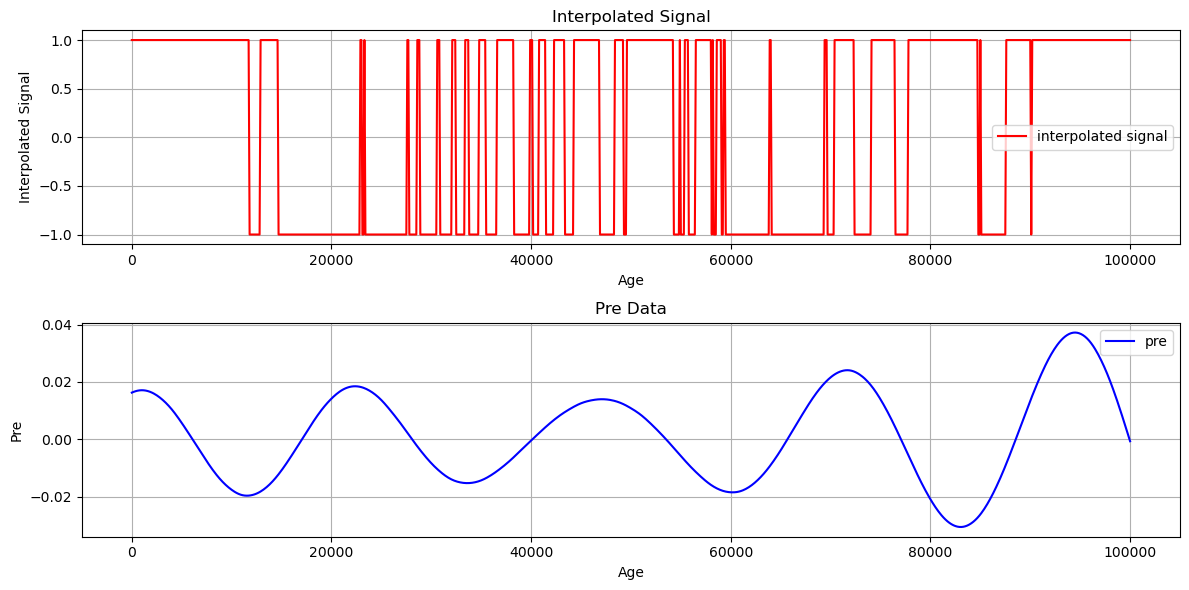

           age       pre
0      19141.0 -0.000650
1      19241.0  0.000475
2      19341.0  0.001597
3      19441.0  0.002715
4      19541.0  0.003828
...        ...       ...
996   118741.0  0.016798
997   118841.0  0.016690
998   118941.0  0.016568
999   119041.0  0.016431
1000  119141.0  0.016280

[1001 rows x 2 columns]
           age        sq
0      19141.0  1.514347
1      19241.0  0.421664
2      19341.0  0.980987
3      19441.0  1.357961
4      19541.0  1.362984
...        ...       ...
996   118741.0  0.492275
997   118841.0  1.473350
998   118941.0  1.167034
999   119041.0  0.779681
1000  119141.0  1.744471

[1001 rows x 2 columns]


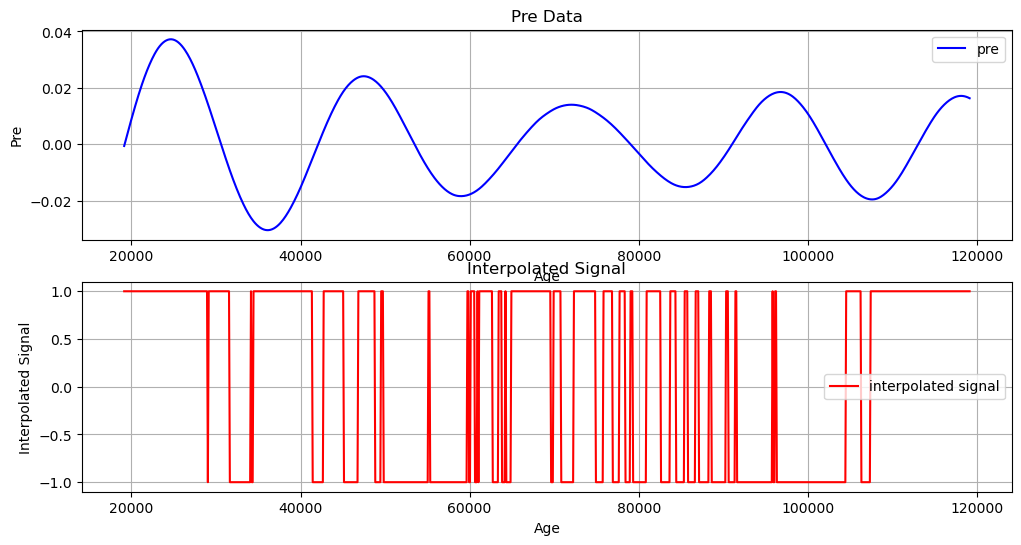

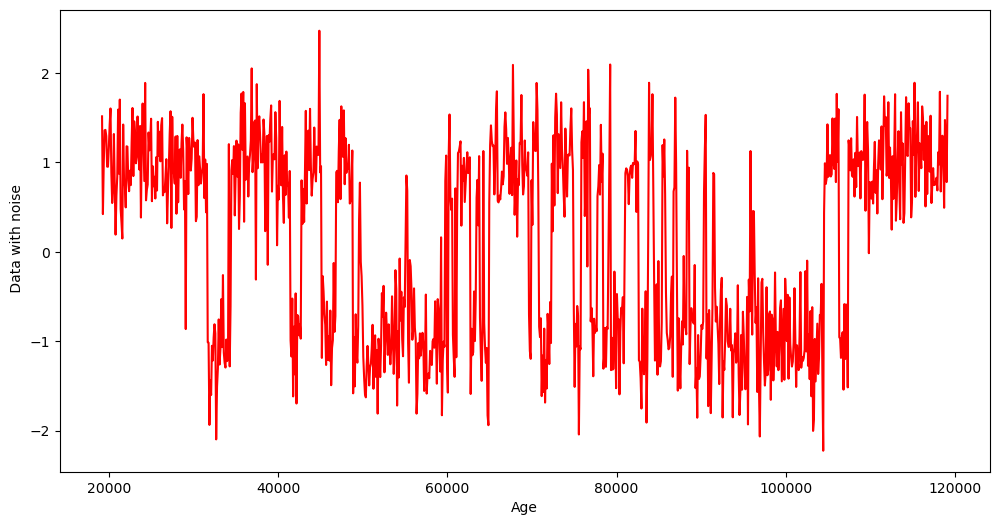

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# your data
data = {
    "event": ["GS-1", "GS-2.1c", "GS-2.2", "GS-3", "GS-4", "GS-5.1", "GS-5.2", "GS-6", "GS-7", "GS-8",
              "GS-9", "GS-10", "GS-11", "GS-12", "GS-13", "GS-14", "GS-15.1", "GS-15.2", "GS-16.1", "GS-16.2",
              "GS-17.1", "GS-17.2", "GS-18", "GS-19.1", "GS-19.2", "GS-20", "GS-21.1", "GS-21.2", "GS-22",
              "GS-23.1", "GS-23.2", "GS-24.1", "GS-24.2", "GS-25", "GS-26"],
    # note: these are the *start* times of the GS events
    "start": [11703, 14692, 23020, 23340, 27780, 28900, 30840, 32500, 33740, 35480,
              38220, 40160, 41460, 43340, 46860, 49280, 54220, 55000, 55800, 58040,
              58280, 59080, 59440, 64100, 69620, 72340, 76440, 84760, 85060, 90040,
              104040, 104520, 106750, 108280, 115370],
    # and these are the *end* times
    "end":   [12896, 22900, 23220, 27540, 28600, 30600, 32040, 33360, 34740, 36580,
              39900, 40800, 42240, 44280, 48340, 49600, 54900, 55400, 56500, 58160,
              58560, 59300, 63840, 69400, 70380, 74100, 77760, 84960, 87600, 90140,
              104380, 105440, 106900, 110640, 119140]
}

# build the signal
starts = np.array(data["start"], dtype=int)
ends   = np.array(data["end"],   dtype=int)

# total length -- one past the last index
N = ends.max() + 1

# initialize at +1
signal = np.ones(N, dtype=int)

# for each event, set the interval [start, end) to -1
for s, e in zip(starts, ends):
    signal[s:e] = -1

# signal =signal *-1

# optional: plot a snippet to visualize
plt.figure(figsize=(12, 2))
plt.plot(signal, drawstyle='steps-post')
plt.ylim(-1.5, 1.5)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Square wave: –1 during GS intervals, +1 elsewhere")
plt.show()

print(signal)





import pandas as pd
from scipy.interpolate import interp1d

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]
df_pre.columns = ['age', 'pre']

# plot df_pre
plt.figure(figsize=(12, 6))
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
print(df_pre)


x = np.arange(N)
# build an interpolator; use 'nearest' to preserve the step
f = interp1d(x, signal, kind='nearest',
             bounds_error=False,
             fill_value=1)            
interpolated_sq = f(df_pre['age'].values)

# flip df_pre and interpolated_sq upside down
print(interpolated_sq)
print(df_pre.head())

# plot the interpolated signal and df_pre in 2 by 1 subplot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_pre['age'], interpolated_sq, label='interpolated signal', color='red')
plt.xlabel("Age")
plt.ylabel("Interpolated Signal")
plt.title("Interpolated Signal")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df_pre['age'], df_pre['pre'], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.title("Pre Data")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

pre=np.flip(df_pre['pre'].values)
age=np.flip(df_pre['age'].values*-1+N)
sq=np.flip(interpolated_sq)

# create dataframe for pre and sq, respectively
df_pre = pd.DataFrame({'age': age, 'pre': pre})
df_sq = pd.DataFrame({'age': age, 'sq': sq})

#plot the pre and sq in 2 by 1 subplot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(age, pre, label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.title("Pre Data")
plt.legend()
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(age, sq, label='interpolated signal', color='red')
plt.xlabel("Age")
plt.ylabel("Interpolated Signal")
plt.title("Interpolated Signal")
plt.legend()
plt.grid()



# create a white noise signal that is the same length as the sq signal
# and has a mean of 0 and a standard deviation of 1
white_noise = np.random.normal(0, 0.4, len(sq))
df_sq['sq'] = df_sq['sq'] + white_noise

#plot the df_sq
plt.figure(figsize=(12, 6))
plt.plot(df_sq['age'], df_sq['sq'], label='interpolated signal', color='red')
plt.xlabel("Age")
plt.ylabel(" Data with noise")

print(df_pre)
print(df_sq)

In [5]:
df_sq

,age,sq
0,19141.0,0.982016
1,19241.0,1.125665
2,19341.0,1.031194
3,19441.0,1.046817
4,19541.0,0.970272
...,...,...
996,118741.0,0.763298
997,118841.0,0.969220
998,118941.0,1.003342
999,119041.0,0.861287


In [19]:
age.shape

(1001,)

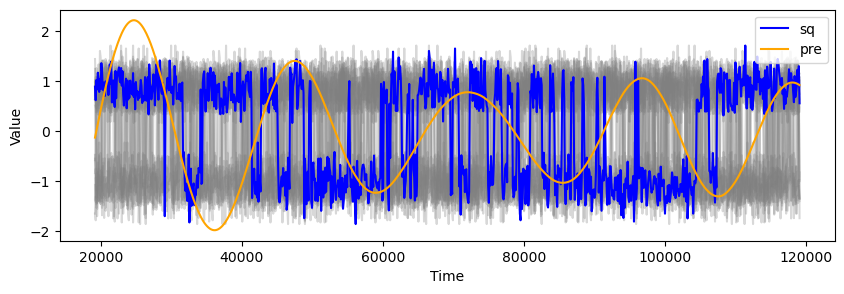

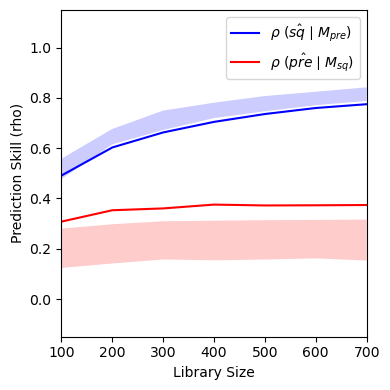

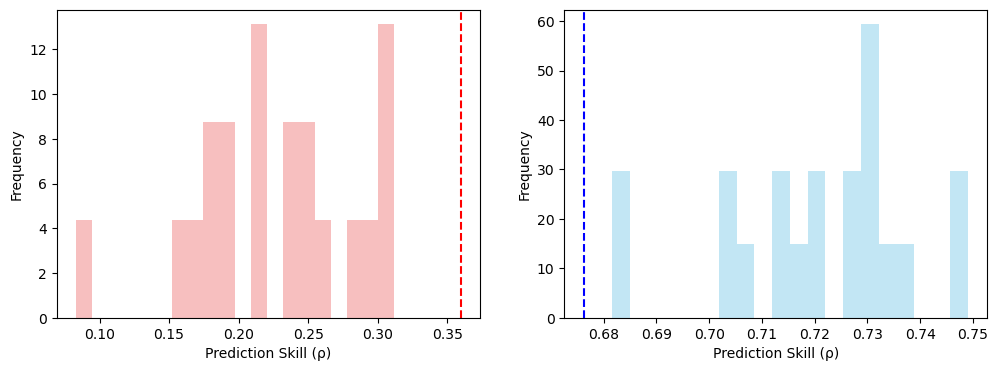

In [19]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sq, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

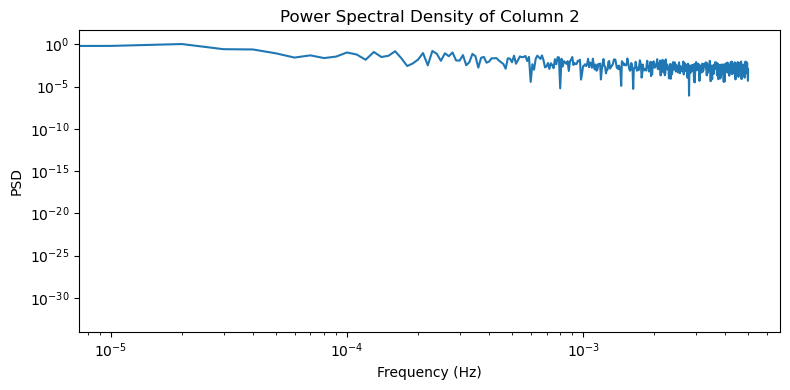

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract your time (or sample index) and signal
#    If your first column is time (in seconds, years, etc.):
t = df_sq.iloc[:, 0].values
x = df_sq.iloc[:, 1].values

# 2. Compute sampling interval and number of points
dt = np.median(np.diff(t))        # assume roughly uniform spacing
N  = len(x)

# 3. Remove any DC offset
x_detrended = x - np.mean(x)

# 4. Compute FFT and frequencies
X      = np.fft.rfft(x_detrended)
freqs  = np.fft.rfftfreq(N, d=dt)

# 5. Compute one‐sided PSD
#    PSD = (1/(fs*N)) * |X|^2, where fs = 1/dt
psd = (1.0 / (N * dt)) * np.abs(X)**2

# 6. Plot
plt.figure(figsize=(8,4))
plt.loglog(freqs, psd, linewidth=1.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Power Spectral Density of Column 2")
plt.tight_layout()
plt.show()


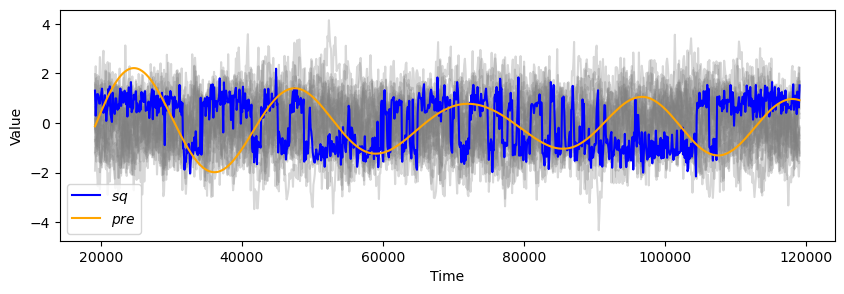

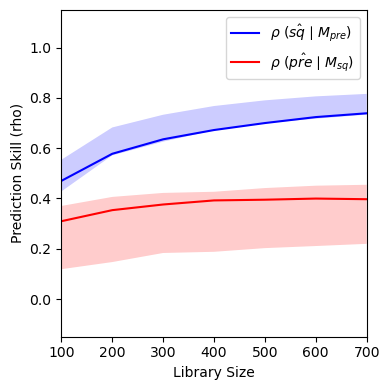

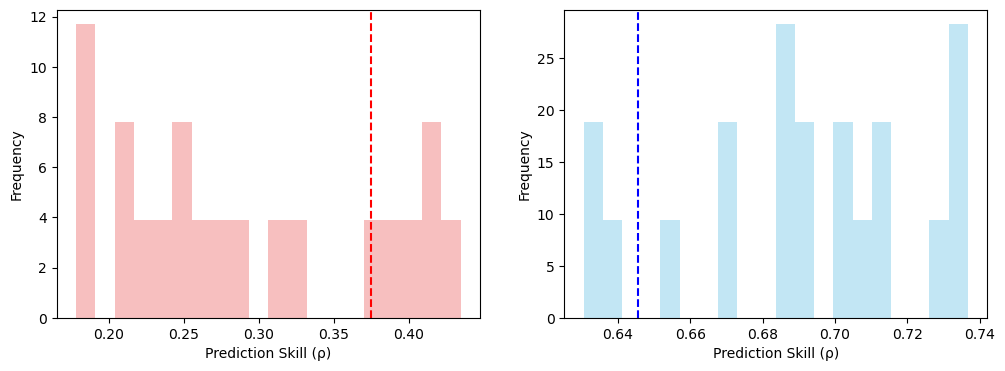

In [27]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sq, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)